In [8]:
from attrs import define
import numpy as np
import matplotlib.pyplot as plt

import mfe.utils
import mfe.elem_lib
import mfe.baseclasses
import mfe.gauss
import mfe.plot

In [9]:
ELEMENTS = {
    'linear': {
        'elem': mfe.elem_lib.Linear2D.from_element_coords(
            [
                np.array([0, 0]), 
                np.array([12, -1]), 
                np.array([15, 8]), 
                np.array([-1, 10])]
        ),
        'q': np.array([0, 0, 0.1, -0.1, 0.1, 0.1, -0.1, 0.1])
    },
    'quad': {
        'elem': mfe.elem_lib.Quadratic2D.from_element_coords(
            [
                np.array([0, 0]), 
                np.array([6, 0.5]), 
                np.array([12, -1]),
                np.array([11, 5]),
                np.array([15, 8]),
                np.array([6, 11]),
                np.array([-1, 10]),
                np.array([1, 5]),
            ]
        ),
        'q': np.array([0, 0, 0.1, -0.1, 0.2, -0.3, 0.2, -0.3, 0.2, -0.3, 0.1, -0.1, 0.0, 0.1, 0.0, 0.0])
    },
}
MATERIALS = {
    'aluminum': mfe.baseclasses.Material(E=70000, nu=0.33)
}

GAUSS_POINTS = {
    1: {
        'loc': [0.0],
        'weights': [2.0]
    },
    2: {
        'loc': [-0.57735, 0.57735],
        'weights': [1.0, 1.0]
    },
    3: {
        'loc': [-0.775, 0.0, 0.775],
        'weights': [0.556, 0.889, 0.556]
    },
}
THICKNESS = 1.3

In [10]:
# Creat the element and stiffness matrix
elem = ELEMENTS['quad']['elem']
D = MATERIALS['aluminum'].D_isotropic_plane_strain()

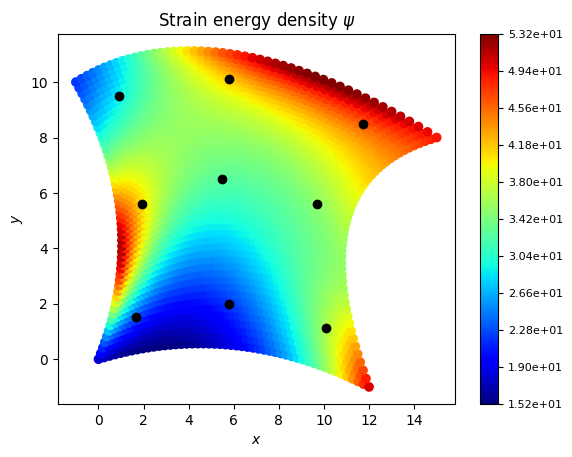

In [11]:
# Compute the strain energy density for a grid over the entire element
natural_grid = mfe.utils.make_natural_grid(50)
eps = elem.compute_strain(ELEMENTS['quad']['q'], natural_grid)
sigma = elem.compute_stress(eps, D)
psi = elem.compute_strain_energy_density(sigma, eps)

# Interpolate to map natural to local element coordinates
x_grid = elem.interpolate(elem.x_element, natural_grid)

# Interpolate to map integration point positions in natural to local element coordinates
x_itg_pts = elem.interpolate(elem.x_element, elem.integration_points.x_natural)

# Plot contours
fig, ax = plt.subplots()
ax = mfe.plot.plot_interpolated_element(
    x_grid, psi, ax, coord_sys='element', method='scatter', title=r'Strain energy density $\psi$', cmap='jet'
)

# Plot position of integration points required for exact solution
ax.scatter(x_itg_pts[:, :, 0, 0], x_itg_pts[:, :, 1, 0], color='k')

Text(0.5, 1.0, 'Stiffness matrix $\\mathbf{k}$')

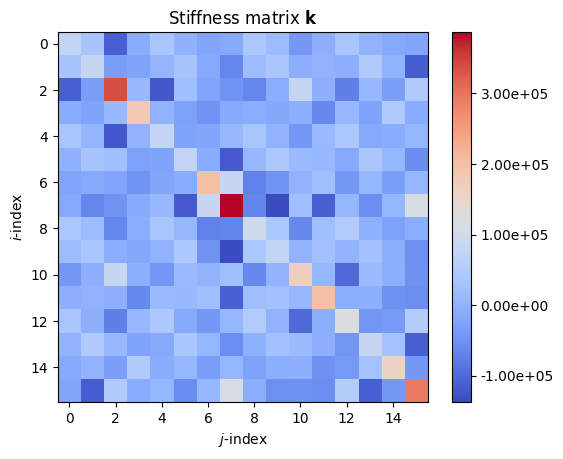

In [12]:
# Compute and plot the stiffness matrix with a heatmap
k = elem.compute_K(D, THICKNESS)
fig, ax = plt.subplots()
c = ax.imshow(k, cmap='coolwarm')
fig.colorbar(c, format='{x:.2e}')
ax.set_ylabel('$i$-index')
ax.set_xlabel('$j$-index')
ax.set_title(r'Stiffness matrix $\mathbf{k}$')

In [17]:
# Inputs
dof = 2


# Assembly matrix dev
rng = np.random.default_rng()
e1 = np.array([0, 1, 2, 3, 4, 5, 6, 7])
e2 = np.array([5, 6, 7, 8, 9, 10, 11, 12])
e3 = np.array([10, 11, 12, 13, 14, 15, 16, 17])
e4 = np.array([0, 1, 2, 17, 18, 19, 20, 21])
# for e in [e1, e2, e3, e4]:
#     rng.shuffle(e)
connectivity = np.vstack([e1, e2, e3, e4])

# (i, j) map
nnodes = np.unique(connectivity).shape
print(nnodes)

# Each element gets an nnodes x nnodes x ndof x ndof array of indices mapping from local to  to global assembly

# assembly_map = np.empty(shape=(connectivity.shape[0], -))
# print(assembly_map.shape)
# print(nnodes)
# # count = 0
# for elem_id, ctv in enumerate(connectivity):
#     # Compute k
#     count = 0
#     for component in [1, 2]:
#         for loc_id, glob_id in enumerate(ctv):
#             idx_1 = dof*(loc_id - 1) + component + 1
#             for loc_id_2, glob_id_2 in enumerate(ctv):
#                 idx_2 = dof*(loc_id_2 - 1) + component + 1
#                 count += 1
#     # for glob_id_1 in ctv:
#     #     for component in [1, 2]:
#     #         for glob_id_2 in ctv:
#     #             for component in [1, 2]:
#     #                 count += 1
#     print(count)
#                 # print(fr'({elem_id}: ({glob_id}, {glob_id_2}) -> ({loc_id}, {loc_id_2}): dof = {component}, (i, j) = {idx_1}, {idx_2})')
#                 # print

#             # print(idx_1)

#         # print(loc_id, glob_i )
#     # idx = dof*(local_node_id - 1) + component
#     # print(elem_id, ctv)

# # print(connectivity)


(22,)


In [15]:
256**0.5
64*4

256